# Ridge and Lasso 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_boston

In [4]:
df=load_boston()

In [5]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
data=pd.DataFrame(df.data)

In [10]:
data.columns=df.feature_names

In [12]:
data["price"]=df.target

In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
x=data.iloc[:,:-1]
y=data['price']

In [31]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [32]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg=LinearRegression()

### Cross validation

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score

In [42]:
mse=cross_val_score(reg,x,y,scoring='neg_mean_squared_error',cv=5)

In [43]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [44]:
np.mean(mse)

-37.13180746769922

### Ridge regression

In [46]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import GridSearchCV

In [49]:
rid=Ridge()
#grid=GridSearchCV()

In [51]:
param={'alpha':[1e-15,1e-2,1e-3,10,20,30,50,60]}

In [52]:
rid_reg=GridSearchCV(estimator=rid,param_grid=param,scoring='neg_mean_squared_error',cv=5, verbose=1)
rid_reg.fit(x,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.01, 0.001, 10, 20, 30, 50, 60]},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
print(rid_reg.best_params_)
print(rid_reg.best_score_)

{'alpha': 60}
-30.48503803909528


### Lasso 

In [55]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  positive)
C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  positive)
C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  positive)
C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to in

{'alpha': 1}
-35.531580220694856


### ploting

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [59]:
las_ped=lasso_regressor.predict(x_test)
rid_ped=rid_reg.predict(x_test)

In [60]:
import seaborn as sns

C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

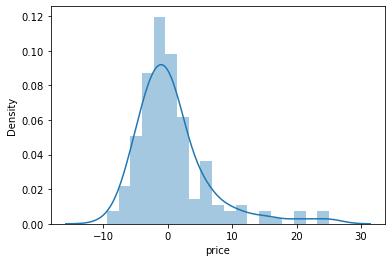

In [65]:
sns.distplot(y_test-las_ped,kde=True)


C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

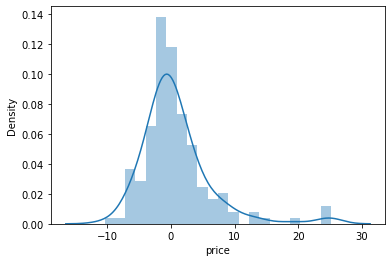

In [75]:
sns.distplot(y_test-rid_ped,kde=True)

### Prediction

In [69]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_test,rid_ped)

0.6721427062552765

### Elasticnet

In [76]:
from sklearn.linear_model import ElasticNet

In [77]:
enet=ElasticNet()

In [82]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,5,10,20,30,35,40,45,50,55,100]}
enet_reg=GridSearchCV(enet,parameters,scoring='neg_mean_squared_error',cv=5)

In [83]:
enet_reg.fit(x,y)

C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4857.303366714691, tolerance: 3.9191485420792076
  positive)
C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4383.046915547903, tolerance: 3.3071316790123455
  positive)
C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4168.666945716643, tolerance: 2.813643886419753
  positive)
C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to in

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 5, 10, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [84]:
enet_reg.best_params_

{'alpha': 0.01}

In [86]:
enet_pred=enet_reg.predict(x_test)

In [88]:
r2_score(y_test,enet_pred)

0.6830805197072836

C:\Users\SOUMALLA-ANTARA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

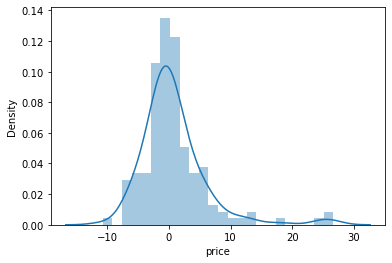

In [89]:
sns.distplot(y_test-enet_pred,kde=True)